# Coursework



In [ ]:
from google.colab import drive
import os
import json
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, Dropout, Flatten, Add, Lambda
from keras.layers import LSTM
from keras.datasets import imdb
import math
from itertools import chain

from keras import __version__
from keras import backend as K


import numpy as np
import matplotlib.pyplot as plt

def plot_history(history, metric = None):
  # Plots the loss history of training and validation (if existing)
  # and a given metric
  # Be careful because the axis ranges are automatically adapted
  # which may not desirable to compare different runs.
  # Also, in some cases you may want to combine several curves in one
  # figure for easier comparison, which this function does not do.
  
  if metric != None:
    fig, axes = plt.subplots(2,1)
    axes[0].plot(history.history[metric])
    try:
      axes[0].plot(history.history['val_'+metric])
      axes[0].legend(['Train', 'Val'])
    except:
      pass
    axes[0].set_title('{:s}'.format(metric))
    axes[0].set_ylabel('{:s}'.format(metric))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(history.history['loss'])
    try:
      axes[1].plot(history.history['val_loss'])
      axes[1].legend(['Train', 'Val'])
    except:
      pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
  else:
    plt.plot(history.history['loss'])
    try:
      plt.plot(history.history['val_loss'])
      plt.legend(['Train', 'Val'])
    except:
      pass
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
  


In [ ]:
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 05_RNN.ipynb		    airline-passengers.csv.2   results1.csv
 airline-passengers.csv     airline-passengers.csv.3  'Task One.ipynb'
 airline-passengers.csv.1  'Copy of 05_RNN.ipynb'      test.csv


### **Task 1: RNN Regression**

In this task, you are asked to estimate the next value of a time series. Specifically, we have selected the popular airline passenger dataset. This dataset contains the number of passengers that travels with a certain airline company. The data contains 144 entries, each entry corresponds to the number of the passengers that travel in a given month. The dataset starts in 1949, and it lasts until 1960. 

Similarly to the previous example, we import the data and plot it to see the structure.

--2021-03-25 15:13:52--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.4’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0.001s  

2021-03-25 15:13:52 (2.66 MB/s) - ‘airline-passengers.csv.4’ saved [2180/2180]



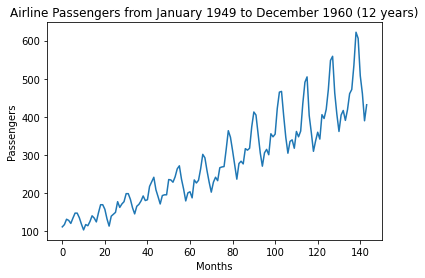

Number of samples training set: 100
Number of samples test set: 44


In [ ]:
import pandas
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import numpy as np

def get_predict_and_score(model, X, Y):
    # transform the prediction to the original scale.
    pred = normalizer.inverse_transform(model.predict(X))
    # transform also the label to the original scale for interpretability.
    orig_data = normalizer.inverse_transform([Y])
    # calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return score, pred

def create_dataset(dataset, window_size = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size - 1):
        sample = dataset[i:(i + window_size), 0]
        data_x.append(sample)
        data_y.append(dataset[i + window_size, 0])
    return(np.array(data_x), np.array(data_y))

!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
data = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(data)
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("Airline Passengers from January 1949 to December 1960 (12 years)")
plt.show()

# convert pandas data frame in numpy array of float.
data_np = data.values.astype("float32")

# normalize data with min max normalization
normalizer = MinMaxScaler(feature_range = (0, 1))
dataset = normalizer.fit_transform(data_np)

# Using 70% of data for training, 30% for test.
TRAINING_PERC = 0.70

train_size = int(len(dataset) * TRAINING_PERC)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of samples training set: " + str((len(train))))
print("Number of samples test set: " + str((len(test))))



First of all, you need to train an RNN on the airline passenger dataset. This exercise expects you to study the impact of the `window_size` variable when defining the `train` and `test` dataset splits. Remember that the `window_size` variable indicates the number of past observations used for predicting the current value. Here, we treat the `test` split as a validation set. 

Shape of training inputs: (98, 1, 1)
Shape of training labels: (98,)
Training data error: 23.77 MSE
Test data error: 50.58 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results1/assets


Shape of training inputs: (97, 2, 1)
Shape of training labels: (97,)
Training data error: 29.22 MSE
Test data error: 67.18 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results2/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results2/assets


Shape of training inputs: (96, 3, 1)
Shape of training labels: (96,)
Training data error: 26.84 MSE
Test data error: 56.47 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results3/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results3/assets


Shape of training inputs: (95, 4, 1)
Shape of training labels: (95,)
Training data error: 25.60 MSE
Test data error: 58.93 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results4/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results4/assets


Shape of training inputs: (94, 5, 1)
Shape of training labels: (94,)
Training data error: 22.45 MSE
Test data error: 47.25 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results5/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results5/assets


Shape of training inputs: (93, 6, 1)
Shape of training labels: (93,)
Training data error: 21.89 MSE
Test data error: 46.36 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results6/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results6/assets


Shape of training inputs: (92, 7, 1)
Shape of training labels: (92,)
Training data error: 22.53 MSE
Test data error: 50.79 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results7/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results7/assets


Shape of training inputs: (91, 8, 1)
Shape of training labels: (91,)
Training data error: 21.99 MSE
Test data error: 46.03 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results8/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results8/assets


Shape of training inputs: (90, 9, 1)
Shape of training labels: (90,)
Training data error: 23.15 MSE
Test data error: 52.92 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results9/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results9/assets


Shape of training inputs: (89, 10, 1)
Shape of training labels: (89,)
Training data error: 21.92 MSE
Test data error: 45.33 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results10/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results10/assets


Shape of training inputs: (88, 11, 1)
Shape of training labels: (88,)
Training data error: 17.88 MSE
Test data error: 40.87 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results11/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results11/assets


Shape of training inputs: (87, 12, 1)
Shape of training labels: (87,)


Training data error: 16.09 MSE
Test data error: 38.57 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results12/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results12/assets


Shape of training inputs: (86, 13, 1)
Shape of training labels: (86,)


Training data error: 18.13 MSE
Test data error: 37.32 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results13/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results13/assets


Shape of training inputs: (85, 14, 1)
Shape of training labels: (85,)


Training data error: 19.56 MSE
Test data error: 98.26 MSE


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results14/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/results14/assets


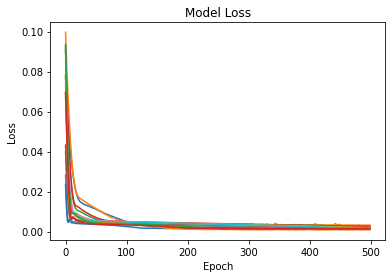

In [ ]:
for window_size in range(1,15):

# window_size = 2 #Use this variable to build the dataset with different number of inputs

  # Create test and training sets for regression with different window sizes.
  train_X, train_Y = create_dataset(train, window_size)
  test_X, test_Y = create_dataset(test, window_size)
  train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
  test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

  print("Shape of training inputs: " + str((train_X.shape)))
  print("Shape of training labels: " + str((train_Y.shape)))

  batch_size = 32
  rnn = Sequential()    
  rnn.add(LSTM(16, input_shape = (window_size, 1)))
  rnn.add(Dense(1))
  rnn.compile(loss = "mean_squared_error",  optimizer = "adam", metrics = ['mse'])

  history=rnn.fit(train_X, train_Y, epochs=500, batch_size=batch_size, verbose=0)
  plot_history(history)
  mse_train, train_predict = get_predict_and_score(rnn, train_X, train_Y)
  mse_test, test_predict = get_predict_and_score(rnn, test_X, test_Y)

  print("Training data error: %.2f MSE" % mse_train)
  print("Test data error: %.2f MSE" % mse_test)

  # Training predictions.
  train_predictions = np.empty_like(dataset)
  train_predictions[:, :] = np.nan
  train_predictions[window_size:len(train_predict) + window_size, :] = train_predict
  print
  # Test predictions.
  test_predictions = np.empty_like(dataset)
  test_predictions[:, :] = np.nan
  test_predictions[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict


  train_predictionslist = list(chain(*train_predictions))
  vars()["results"+str(window_size)]=pd.DataFrame({'train_pred':train_predictionslist})
  name = vars()["results"+str(window_size)]

  test_predictionslist = list(chain(*test_predictions))
  vars()["results2"+str(window_size)]=pd.DataFrame({'test_pred':test_predictionslist})
  name2 = vars()["results2"+str(window_size)]

  historydf=pd.DataFrame.from_dict(history.history)

  dataframe = pd.concat([historydf, name], axis=1)
  dataframeReturn = pd.concat([dataframe, name2], axis=1)
  dataframeReturn.loc[len(dataframeReturn)]=['mse_train',0,0,mse_train]
  dataframeReturn.loc[len(dataframeReturn)]=['mse_test',0,0,mse_test]

  dataframeReturn.to_csv('/content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/{}.csv'.format("results"+str(window_size)))

  rnn.save("/content/drive/My Drive/Deep Learning 2021/Notebook Five - RNN/{}".format("results"+str(window_size)))



In [ ]:

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(normalizer.inverse_transform(dataset), label = "True value")
plt.plot(train_predictions, label = "Training predictions")
plt.plot(test_predictions, label = "Test predictions")
plt.xlabel("Months")
plt.ylabel("1000 member subscriptions")
plt.title("Comparison true vs. predicted in the training and testing set")
plt.legend()
plt.show()


**Report**:

*   Create a plot showing the test curves of models trained with different `window_size` values. Report the plot and discuss the main differences you observe between the predicted curves. You can use the style proposed on the Many to One RNNs - Regression section to plot your curves.